<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


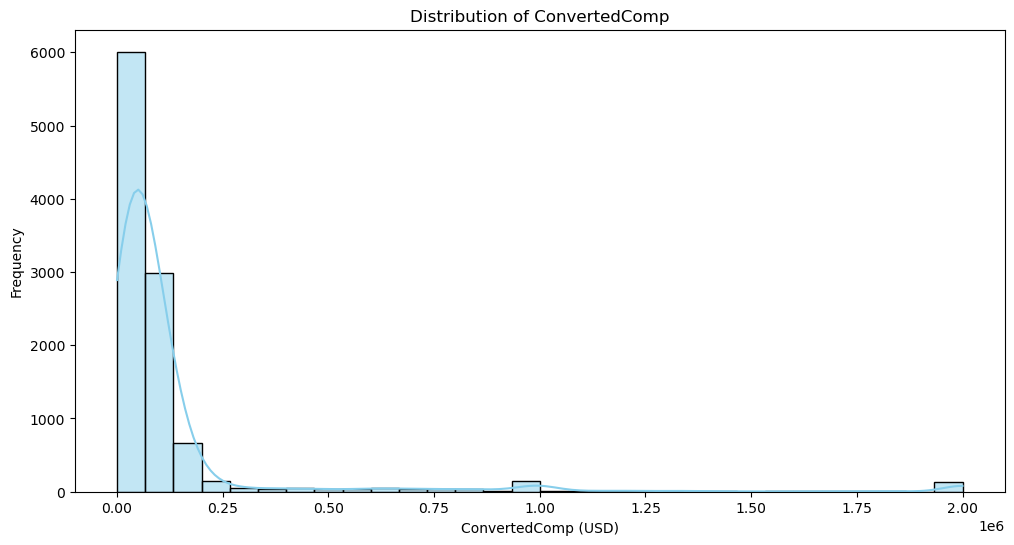

In [3]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution curve for the 'ConvertedComp' column
plt.figure(figsize=(12, 6))
sns.histplot(df['ConvertedComp'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.ylabel('Frequency')
plt.show()

Plot the histogram for the column `ConvertedComp`.


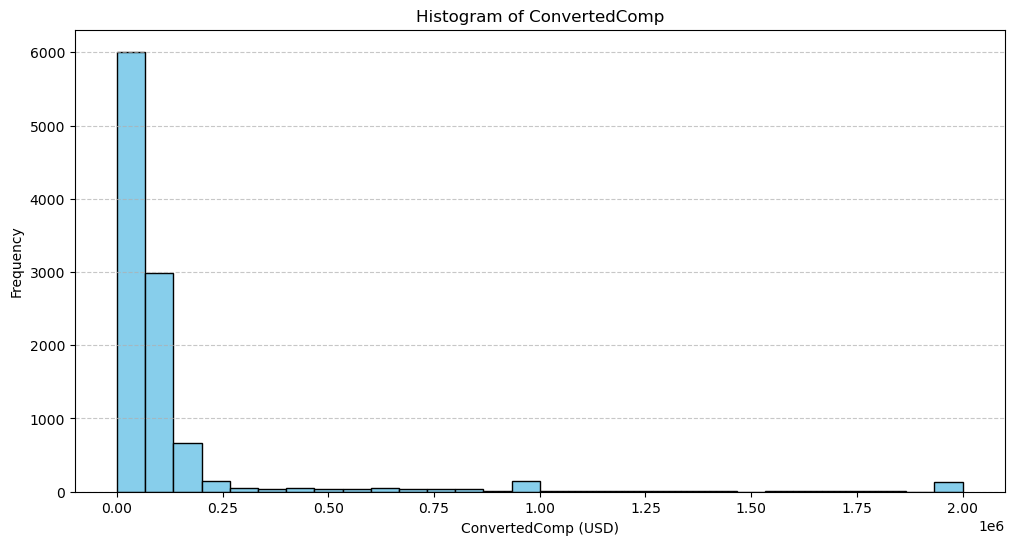

In [4]:
# your code goes here

# Plot the histogram for the 'ConvertedComp' column
plt.figure(figsize=(12, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here

# Calculate the median of the 'ConvertedComp' column
median_converted_comp = df['ConvertedComp'].median()

# Print the median
print(f"The median of the 'ConvertedComp' column is: {median_converted_comp}")


The median of the 'ConvertedComp' column is: 57745.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here

# Filter the DataFrame for respondents identifying as 'Man'
man_responders = df[df['Gender'] == 'Man']

# Count the number of unique respondents in the filtered DataFrame
num_man_responders = man_responders['Respondent'].nunique()

# Print the number of responders identifying as 'Man'
print(f"The number of responders identifying as 'Man' is: {num_man_responders}")

The number of responders identifying as 'Man' is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here

# Filter the DataFrame for responders identifying as 'Woman'
woman_responders = df[df['Gender'] == 'Woman']

# Calculate the median 'ConvertedComp' for 'Woman' responders
median_converted_comp_woman = woman_responders['ConvertedComp'].median()

# Print the median 'ConvertedComp' for 'Woman' responders
print(f"The median ConvertedComp for responders identifying as 'Woman' is: {median_converted_comp_woman}")

The median ConvertedComp for responders identifying as 'Woman' is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
# Get the five-number summary for the 'Age' column
age_summary = df['Age'].describe(percentiles=[.25, .5, .75])

# Print the five-number summary
print("Five-Number Summary for the 'Age' column:")
print(age_summary[['min', '25%', '50%', '75%', 'max']])


Five-Number Summary for the 'Age' column:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


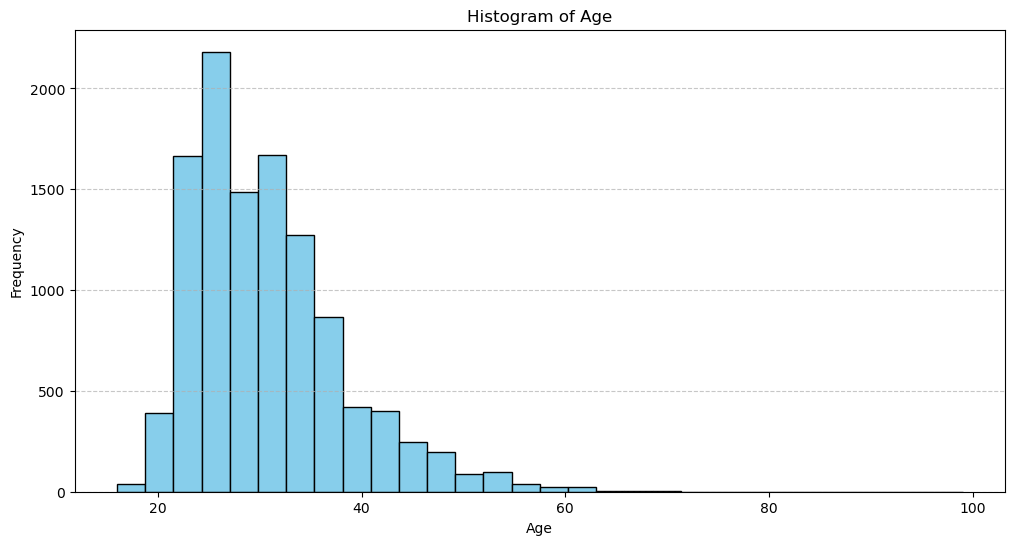

In [9]:
# your code goes here


# Plot the histogram for the 'Age' column
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


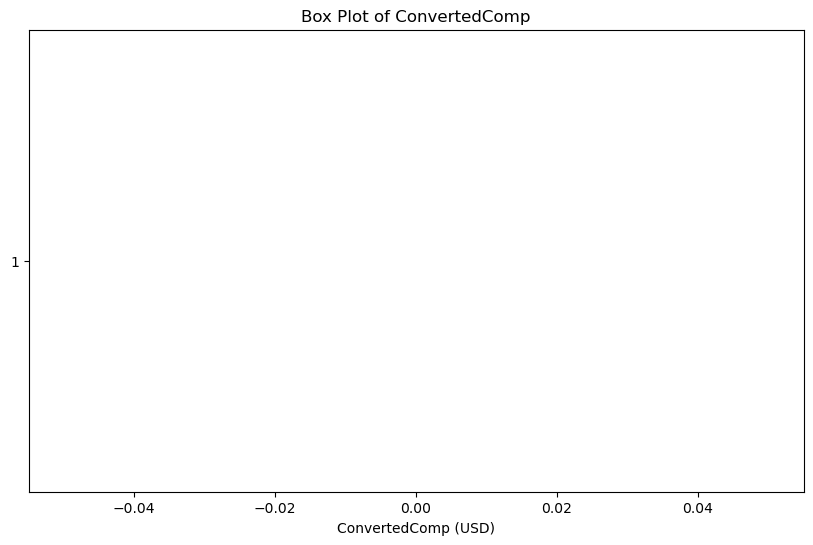

In [10]:
# your code goes here

# Create a box plot for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'], vert=False, patch_artist=True)
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here

# Calculate the Interquartile Range (IQR) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Print the Interquartile Range
print(f"The Interquartile Range (IQR) for 'ConvertedComp' is: {IQR}")

The Interquartile Range (IQR) for 'ConvertedComp' is: 73132.0


Find out the upper and lower bounds.


In [12]:
# your code goes here
import numpy as np

# Calculate the Interquartile Range (IQR) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Print the upper and lower bounds
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")

Upper Bound: 209698.0
Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# your code goes here

# Calculate the Interquartile Range (IQR) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the number of outliers
print(f"The number of outliers in the 'ConvertedComp' column is: {num_outliers}")

The number of outliers in the 'ConvertedComp' column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
# your code goes here

# Calculate the Interquartile Range (IQR) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] <= upper_bound) & (df['ConvertedComp'] >= lower_bound)]

# Print the shape of the new DataFrame without outliers
print(f"Shape of DataFrame without outliers: {df_no_outliers.shape}")

Shape of DataFrame without outliers: (9703, 85)


In [17]:
# Calculate the median age of survey respondents
median_age = df['Age'].median()

# Print the median age
print(f"The median age of survey respondents is: {median_age}")

The median age of survey respondents is: 29.0


In [18]:
#What is the median ConvertedComp of  respondents who have identified themselves as ‘Woman’? 

# Filter the DataFrame for respondents identifying as 'Woman'
woman_responders = df[df['Gender'] == 'Woman']

# Calculate the median 'ConvertedComp' for 'Woman' respondents
median_converted_comp_woman = woman_responders['ConvertedComp'].median()

# Print the median 'ConvertedComp' for 'Woman' respondents
print(f"The median ConvertedComp for respondents identifying as 'Woman' is: {median_converted_comp_woman}")

The median ConvertedComp for respondents identifying as 'Woman' is: 57708.0


In [19]:
#Based on the histogram, which age group has the highest number of survey respondents?

# Find the mode of the 'Age' column
mode_age = df['Age'].mode()

# Print the mode age
print(f"The mode age of survey respondents is: {mode_age.item()}")

The mode age of survey respondents is: 28.0


In [20]:
#What is the median ConvertedComp before removing outliers?

# Calculate the median 'ConvertedComp' before removing outliers
median_converted_comp_before_outliers = df['ConvertedComp'].median()

# Print the median 'ConvertedComp' before removing outliers
print(f"The median ConvertedComp before removing outliers is: {median_converted_comp_before_outliers}")



The median ConvertedComp before removing outliers is: 57745.0


In [21]:
#What is the median ConvertedComp after removing outliers?

# Calculate the Interquartile Range (IQR) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] <= upper_bound) & (df['ConvertedComp'] >= lower_bound)]

# Calculate the median 'ConvertedComp' after removing outliers
median_converted_comp_after_outliers = df_no_outliers['ConvertedComp'].median()

# Print the median 'ConvertedComp' after removing outliers
print(f"The median ConvertedComp after removing outliers is: {median_converted_comp_after_outliers}")

The median ConvertedComp after removing outliers is: 52704.0


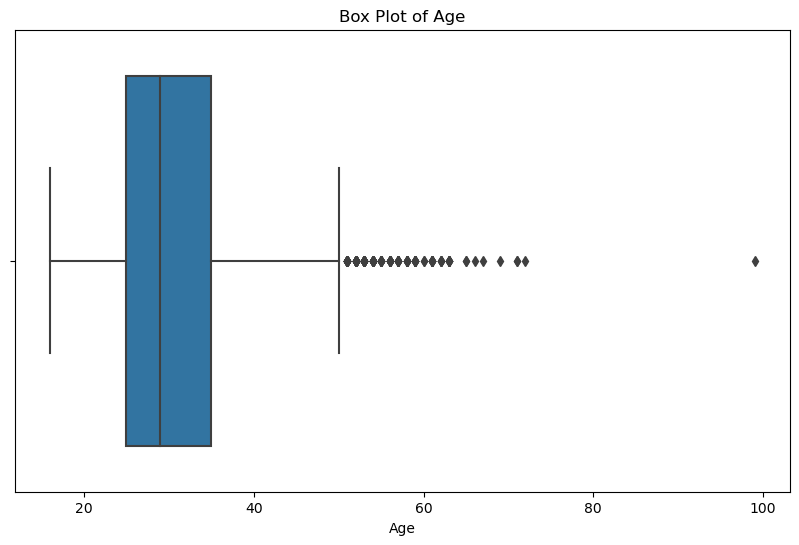

The number of outliers below Q1 in the 'Age' column is: 0


In [22]:
#Based on the boxplot of ‘Age’ how many outliers do you see below Q1?

import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'Age' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Calculate the Interquartile Range (IQR) for 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers below Q1
outliers_below_Q1 = df[df['Age'] < lower_bound]

# Count the number of outliers below Q1
num_outliers_below_Q1 = outliers_below_Q1.shape[0]

# Print the number of outliers below Q1
print(f"The number of outliers below Q1 in the 'Age' column is: {num_outliers_below_Q1}")

In [23]:
#What is the mean ConvertedComp after removing outliers? 

import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

# Calculate the Interquartile Range (IQR) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] <= upper_bound) & (df['ConvertedComp'] >= lower_bound)]

# Calculate the mean 'ConvertedComp' after removing outliers
mean_converted_comp_after_outliers = df_no_outliers['ConvertedComp'].mean()

# Print the mean 'ConvertedComp' after removing outliers
print(f"The mean ConvertedComp after removing outliers is: {mean_converted_comp_after_outliers}")


The mean ConvertedComp after removing outliers is: 59883.20838915799


In [25]:
#Which column has a negative correlation with "Age"? 

# Calculate the correlation between 'Age' and all other numerical columns
#correlations = df.corr()['Age']

# Find the column with the most negative correlation
#column_with_negative_corr = correlations.idxmin()

# Print the column with a negative correlation with 'Age'
#print(f"The column with a negative correlation with 'Age' is: {column_with_negative_corr}")

# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation between 'Age' and all other numerical columns
correlations = df[numeric_columns].corr()['Age']

# Find the column with the most negative correlation
column_with_negative_corr = correlations.idxmin()

# Print the column with a negative correlation with 'Age'
print(f"The column with a negative correlation with 'Age' is: {column_with_negative_corr}")


The column with a negative correlation with 'Age' is: CodeRevHrs


In [30]:
#Which column has the highest correlation with "Age"?

# Exclude non-numeric columns
#numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation between 'Age' and all other numerical columns
#correlations = df[numeric_columns].corr()['Age']

# Find the column with the highest correlation with 'Age'
#column_with_highest_corr = correlations.idxmax()

# Print the column with the highest correlation with 'Age'
#print(f"The column with the highest correlation with 'Age' is: {column_with_highest_corr}")

# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation between all numerical columns
correlations = df[numeric_columns].corr()

# Find the two columns with the highest correlation with any column
top_two_correlations = (correlations.abs().stack()
                        .reset_index(level=0)
                        .sort_values(0, ascending=False)
                        .groupby('level_0')
                        .head(2))

# Print the two columns with the highest correlation with any column
print(f"The two columns with the highest correlation with any column are: {top_two_correlations.index.tolist()}")

The two columns with the highest correlation with any column are: ['Respondent', 'CompTotal', 'CodeRevHrs', 'WorkWeekHrs', 'ConvertedComp', 'Age', 'ConvertedComp', 'Age', 'Age', 'ConvertedComp', 'WorkWeekHrs', 'Respondent']


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [31]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation between 'Age' and all other numerical columns
correlation_with_age = df[numeric_columns].corr()['Age']

# Print the correlation results
print(f"Correlation between 'Age' and other numerical columns:\n{correlation_with_age}")

Correlation between 'Age' and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
